# Tema principal

**Sistema Inteligente de Alerta Antecipado para Mitigação de Riscos de Enchentes em Ambientes Urbanos Críticos**

# Contextualização

Com o avanço da urbanização desordenada e o impacto crescente das mudanças climáticas, grandes cidades enfrentam desafios severos na gestão de desastres naturais, especialmente as enchentes urbanas. Ruas alagadas, trânsito interrompido, hospitais isolados e prejuízos econômicos bilionários são apenas algumas das consequências observadas com frequência.

Pensando em prevenir esse cenário, a Prefeitura de uma capital nacional firmou parceria com um consórcio acadêmico para desenvolver uma Prova de Conceito (PoC) de um sistema de alerta inteligente e em tempo real. Esse sistema será responsável por analisar automaticamente dados de sensores e estações meteorológicas conectadas à Internet das Coisas (IoT), com foco em três variáveis principais:

- Nível de água

- Velocidade do fluxo hídrico

- Volume de precipitação acumulado

A proposta é **utilizar técnicas de Machine Learning supervisionado** para detectar padrões e identificar de forma antecipada regiões com risco iminente de alagamento, permitindo que agentes públicos possam tomar decisões mais ágeis e eficazes — como o bloqueio de vias, redirecionamento de transporte, envio de alertas à população e mobilização da defesa civil.

Diferentemente de abordagens tradicionais baseadas apenas em previsões meteorológicas genéricas, este projeto foca na criação de um modelo que combine análise de dados ambientais e inteligência artificial com base em dados reais e atualizados por sensores urbanos.

# Objetivos propostos

O principal objetivo deste projeto é desenvolver uma prova de conceito (PoC) de um sistema inteligente que ajude no reconhecimento rápido de enchentes em áreas urbanas. A ideia é usar dados vindos de sensores e estações meteorológicas conectadas à internet — como o nível da água, velocidade do fluxo e quantidade de chuva — para **treinar modelos de Machine Learning** capazes de identificar situações de risco.

Durante esse processo, acontecerá de:

**Explorar os dados** com atenção, entendendo bem o comportamento de cada variável e como elas se relacionam com a ocorrência de enchentes.

**Fazer o pré-processamento necessário**, tratando valores ausentes, removendo duplicatas, codificando variáveis categóricas e selecionando os atributos mais relevantes.

**Treinar dois modelos de classificação supervisionada** — **o kNN** (k-Nearest Neighbors) e a **Árvore de Decisão** — para ver qual deles consegue identificar melhor os momentos em que há risco de enchente.

**Comparar os resultados dos modelos**, usando métricas como matriz de confusão e acurácia, para entender qual deles é mais eficiente e adequado ao problema.

Visualizar os resultados de forma clara, usando **gráficos** e explicações para tornar a análise mais acessível e compreensível.

Mais do que só treinar modelos, meu objetivo aqui é mostrar como a inteligência artificial pode ser uma aliada prática na prevenção de desastres urbanos — algo que pode salvar vidas e reduzir danos em cidades cada vez mais afetadas pelas mudanças climáticas.

# Código

In [ ]:
# Importação das bibliotecas que necessitamos para desenvolver o projeto
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração visual
sns.set(style='whitegrid')
%matplotlib inline

In [ ]:
df = pd.read_csv('flood_risk_dataset_india.csv')

# Exibir as primeiras linhas
df.head()

,Latitude,Longitude,Rainfall (mm),Temperature (°C),Humidity (%),River Discharge (m³/s),Water Level (m),Elevation (m),Land Cover,Soil Type,Population Density,Infrastructure,Historical Floods,Flood Occurred
0,18.861663,78.835584,218.999493,34.144337,43.912963,4236.182888,7.415552,377.465433,Water Body,Clay,7276.742184,1,0,1
1,35.570715,77.654451,55.353599,28.778774,27.585422,2472.585219,8.811019,7330.608875,Forest,Peat,6897.736956,0,1,0
2,29.227824,73.108463,103.991908,43.934956,30.108738,977.328053,4.631799,2205.873488,Agricultural,Loam,4361.518494,1,1,1
3,25.361096,85.610733,198.984191,21.569354,34.453690,3683.208933,2.891787,2512.277800,Desert,Sandy,6163.069701,1,1,0
4,12.524541,81.822101,144.626803,32.635692,36.292267,2093.390678,3.188466,2001.818223,Agricultural,Loam,6167.964591,1,0,0


Ao observar as primeiras linhas do dataset, já é possível identificar algumas informações interessantes e relevantes para a análise do risco de enchentes:

- O dataset possui **variáveis geográficas** (`Latitude`, `Longitude`, `Elevation`) que podem indicar a localização e a altitude das regiões analisadas — fatores cruciais para entender a vulnerabilidade a alagamentos.

- As variáveis climáticas como `Rainfall (mm)`, `Temperature (°C)`, `Humidity (%)`, `River Discharge (m³/s)` e `Water Level (m)` são **quantitativas** e têm potencial direto para impactar a ocorrência de enchentes. Já nas primeiras linhas, por exemplo, vemos casos com chuvas intensas e altos níveis de descarga fluvial associados a inundações (`Flood Occurred` = 1).

- A variável `Flood Occurred` é a nossa **variável alvo** (target), indicando se ocorreu (1) ou não (0) uma enchente naquela condição registrada.

- Algumas colunas também fornecem informações sobre o tipo de solo (`Soil Type`), cobertura do terreno (`Land Cover`) e densidade populacional, o que permite considerar aspectos ambientais e sociais no modelo. Por exemplo, uma área com alta densidade populacional e infraestrutura **pode ter impactos diferentes** de uma área rural com baixa ocupação.

- Já as variáveis `Infrastructure` e `Historical Floods` indicam, respectivamente, se a região possui infraestrutura urbana e se já houve inundações anteriores. Essas variáveis são importantes para análise de risco e **podem influenciar** na probabilidade de uma nova enchente.

- É possível perceber que nem toda alta precipitação resulta em enchente — como na 5ª linha, que tem chuva intensa mas `Flood Occurred` = 0. Isso sugere que o **modelo precisa considerar uma combinação de fatores**, não apenas chuva isolada.

Esses primeiros dados ajudam a entender que o fenômeno de enchente é **multifatorial**, o que reforça a importância de usar algoritmos de aprendizado de máquina para detectar padrões mais complexos entre as variáveis.

**Objetivo**: Desenvolver um sistema de detecção de enchentes com base em sensores e dados climáticos.  
**Variável Alvo (target)**: `Flood` – 0 (sem enchente), 1 (com enchente).


In [ ]:
# Coleta de informações do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Latitude                10000 non-null  float64
 1   Longitude               10000 non-null  float64
 2   Rainfall (mm)           10000 non-null  float64
 3   Temperature (°C)        10000 non-null  float64
 4   Humidity (%)            10000 non-null  float64
 5   River Discharge (m³/s)  10000 non-null  float64
 6   Water Level (m)         10000 non-null  float64
 7   Elevation (m)           10000 non-null  float64
 8   Land Cover              10000 non-null  object 
 9   Soil Type               10000 non-null  object 
 10  Population Density      10000 non-null  float64
 11  Infrastructure          10000 non-null  int64  
 12  Historical Floods       10000 non-null  int64  
 13  Flood Occurred          10000 non-null  int64  
dtypes: float64(9), int64(3), object(2)
memo

 Informações Gerais do Dataset `df.info()`
O comando `df.info()` mostra que o dataset possui **10.000 registros e 14 colunas**, sem valores ausentes em nenhuma variável — o que é excelente para análise e modelagem, pois elimina a necessidade de tratamento de dados nulos.

Tipos de Dados:
- 9 variáveis **numéricas contínuas** do tipo float64 — como `Rainfall`, `Temperature`, `Humidity`, `Water Level`, entre outras.

- 3 variáveis categóricas do tipo **object**: `Land Cover`, `Soil Type` e `Population Density`. Essas precisarão de codificação (encoding) antes da modelagem com algoritmos de ML.

- 2 variáveis discretas do tipo int64: `Infrastructure` e `Historical Floods`, que indicam presença/ausência (binárias ou booleanas representadas por 0 e 1).

Principais Insights:
- **Não há valores ausentes**, o que evita a perda de dados e torna o processo de preparação mais eficiente.

- A presença de variáveis **geográficas, ambientais e socioeconômicas** mostra que o dataset é **multidimensional**, com grande potencial para treinar modelos robustos.

- O target da classificação é a variável `Flood Occurred`, do tipo inteiro (0 = não houve enchente, 1 = houve enchente), sendo ideal para modelos de classificação supervisionada.

- As variáveis categóricas exigirão atenção especial no pré-processamento, como a aplicação de One-Hot Encoding.

Esse panorama mostra que os dados estão em um **formato limpo e adequado** para iniciar a análise exploratória e o treinamento dos modelos de Machine Learning, seguindo as próximas etapas da metodologia.

In [ ]:
# Coleta de informações do dataset
df.describe()

,Latitude,Longitude,Rainfall (mm),Temperature (°C),Humidity (%),River Discharge (m³/s),Water Level (m),Elevation (m),Population Density,Infrastructure,Historical Floods,Flood Occurred
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,22.330627,82.631366,150.015118,29.961401,59.749104,2515.722946,5.017881,4417.138177,5021.468442,0.502000,0.498700,0.505700
std,8.341274,8.389542,86.032127,8.669838,23.142734,1441.706442,2.876579,2530.245421,2882.591520,0.500021,0.500023,0.499993
min,8.000337,68.004575,0.014437,15.000166,20.001339,0.042161,0.002701,1.150340,2.289000,0.000000,0.000000,0.000000
25%,15.143537,75.364428,76.124373,22.405717,39.541778,1284.782376,2.538847,2229.681903,2491.766601,0.000000,0.000000,0.000000
50%,22.283330,82.671007,150.620428,30.000907,59.497375,2530.451944,5.042094,4417.199761,5074.392879,1.000000,0.000000,1.000000
75%,29.460184,89.937897,223.402156,37.413488,80.038163,3767.229862,7.524692,6616.729066,7474.228752,1.000000,1.000000,1.000000
max,36.991813,96.997820,299.970293,44.993681,99.997772,4999.698480,9.996899,8846.894877,9999.169530,1.000000,1.000000,1.000000


**Estatísticas Descritivas dos Dados** `df.describe()`

A análise estatística descritiva das variáveis numéricas revela algumas características importantes sobre o dataset. Vamos aos principais insights:

Clima e Variáveis Ambientais
- `Rainfall (mm)` varia de **0.01 mm a quase 300 mm**, com média de aproximadamente 150 mm. Essa amplitude sugere desde períodos de estiagem até chuvas muito intensas — condição crítica para enchentes.

- `Temperature (°C)` oscila entre **15°C e 44°C**, com média próxima de **30°C**, indicando uma região com clima predominantemente quente.

- `Humidity (%)` também tem alta variação (de 20% a 99%), mostrando diversidade nos níveis de umidade relativa do ar.

Indicadores Hidrológicos

- `River Discharge (m³/s)` e `Water Level (m)` apresentam grande variação, com descargas que vão de praticamente **0 até 5000 m³/s** e **níveis de água de 0.02 a 9.99 m**. Isso mostra que há registros de regiões secas e também de rios com potencial risco de transbordamento.

- A média da `Water Level` é de aproximadamente **5.02 metros**, mas com desvio padrão alto (≈2.88 m), indicando variação significativa entre os registros.

Geografia e Ocupação Humana

- `Elevation (m)` varia de **1.15 m a mais de 8800 m**, uma diferença bastante expressiva, provavelmente devido à presença de registros em altitudes muito elevadas (ex: regiões montanhosas).

- `Population Density` vai de **2.28 até 9999 habitantes por km²**, indicando que o modelo precisa lidar com regiões rurais e altamente urbanizadas.

Infraestrutura e Histórico

- As variáveis `Infrastructure` e `Historical Floods` são binárias (0 ou 1), com **média próxima de 0.5**, ou seja, o dataset está balanceado entre locais com e sem infraestrutura ou histórico de enchentes, o que é positivo para treinamento de modelos sem viés.

Alvo: `Flood Occurred`
- A variável alvo `Flood Occurred` também está equilibrada: cerca de **50,57%** dos registros indicam enchentes, o que é ótimo, pois evita o problema de classe desbalanceada nos modelos de classificação.

Conclusão
- Essas estatísticas mostram que o dataset é rico, diverso e estatisticamente equilibrado, permitindo que os algoritmos aprendam padrões relevantes para prever enchentes. A presença de amplitude em variáveis ambientais e urbanas é essencial para identificar combinações críticas que levam à ocorrência de inundações.

In [ ]:
df.shape

(10000, 14)

O dataset contém **10.000 registros e 14 variáveis**, o que representa um volume robusto de dados para treinar e validar modelos de Machine Learning. Esse tamanho é suficiente para aplicar algoritmos supervisionados com boa capacidade de generalização, **sem risco imediato de overfitting** (desde que os dados estejam bem distribuídos).

In [ ]:
# Verificação de valores ausentes
df.isnull().sum()

# Verificação de duplicatas
df.duplicated().sum()

# Remoção se houver
df.drop_duplicates(inplace=True)


In [ ]:
# Quantidade de variáveis numéricas e categóricas
num_vars = df.select_dtypes(include=np.number).columns
cat_vars = df.select_dtypes(include='object').columns
print(f"Variáveis numéricas: {len(num_vars)}")
print(f"Variáveis categóricas: {len(cat_vars)}")


Variáveis numéricas: 12
Variáveis categóricas: 2


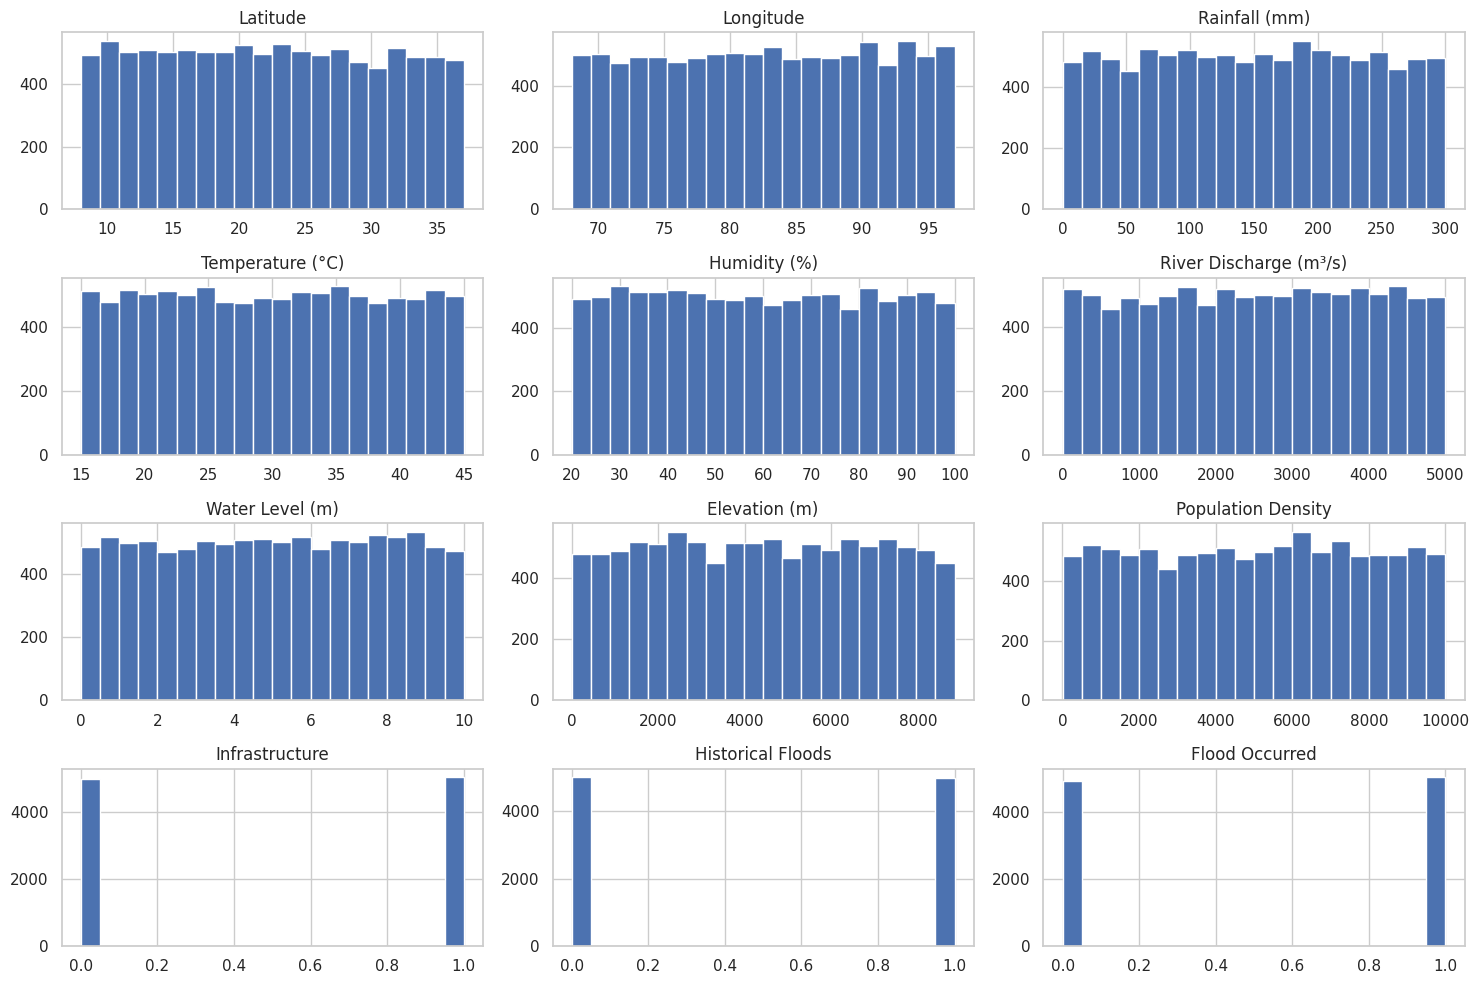

In [ ]:
# Histograma de variáveis numéricas
df[num_vars].hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()


A partir dos histogramas gerados, é possível observar alguns padrões importantes na distribuição dos dados:

- A maioria das variáveis numéricas, como **Latitude, Longitude, Temperatura, Umidade, Nível da Água, Elevação e Densidade Populacional**, apresentam uma distribuição **relativamente uniforme**, o que indica boa diversidade nos dados.

- Variáveis como **Rainfall (chuva)** e **River Discharge (descarga do rio)** também estão bem distribuídas, sem concentração extrema em um único valor. Isso é positivo para o modelo, pois há variação suficiente para ele aprender padrões.

- As variáveis binárias (`Infrastructure`, `Historical Floods` e `Flood Occurred`) estão praticamente balanceadas entre 0 e 1, o que confirma que o dataset não está desbalanceado entre enchentes e não-enchentes — algo fundamental para evitar viés no modelo de classificação.

- **Não há presença visível de valores extremos (outliers) gritantes**, o que indica que os dados estão limpos e prontos para serem usados no treinamento dos modelos, sem a necessidade de remoções ou transformações radicais.

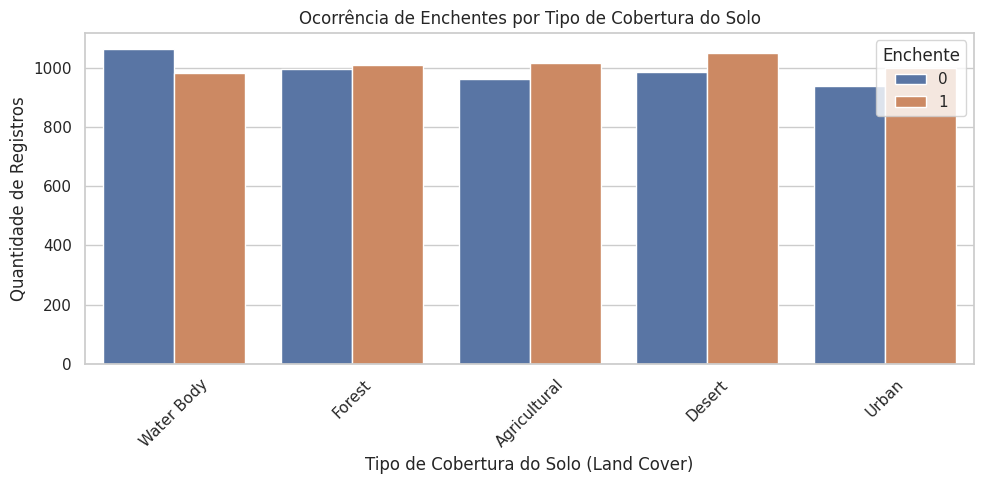

In [ ]:
# Gráfico bivariado: Land Cover vs Flood Occurred
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Land Cover', hue='Flood Occurred')
plt.title('Ocorrência de Enchentes por Tipo de Cobertura do Solo')
plt.xlabel('Tipo de Cobertura do Solo (Land Cover)')
plt.ylabel('Quantidade de Registros')
plt.xticks(rotation=45)
plt.legend(title='Enchente')
plt.tight_layout()
plt.show()



Ao observar as proporções de **Enchente (1)** e **Não Enchente (0)** por tipo de cobertura do solo, notamos tendências distintas:

- Em **Corpos d'água** (`Water Body`), os registros de **Não Enchente (0) são visivelmente mais numerosos que os de Enchente (1).**

- Para Florestas (`Forest`), há um volume um pouco maior de **Enchente (1)** comparado a **Não Enchente (0).**
- Já em Áreas Agrícolas
(`Agricultural`), Desertos (`Desert`) e Áreas Urbanas (`Urban`), os registros de **Enchente (1)** são consideravelmente mais frequentes que os de **Não Enchente (0).**

Essas variações nas ocorrências indicam que a `Land Cover` é uma variável chave, com forte relação com a probabilidade de enchente. A predominância de **Enchente (1)** em áreas como agrícola, deserto e urbana aponta para uma maior suscetibilidade nessas categorias, enquanto em corpos d'água, o desafio é identificar as condições específicas que de fato levam a uma inundação, dado que a maioria dos registros não resulta em enchente.

In [ ]:
# One-Hot Encoding para variáveis categóricas
df_encoded = pd.get_dummies(df, columns=cat_vars, drop_first=True)


Na parte a seguir será a modelagem:

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Separar features e target
# Drop the correct column name 'Flood Occurred'
X = df_encoded.drop("Flood Occurred", axis=1)
y = df_encoded["Flood Occurred"]

# Hold-out
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

A seguir kNN:

In [ ]:
# Teste com diferentes k
results_knn = []
for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results_knn.append((k, acc))

# Melhor k
melhor_k = max(results_knn, key=lambda x: x[1])
print(f"Melhor k: {melhor_k[0]} com acurácia: {melhor_k[1]:.2f}")


Melhor k: 5 com acurácia: 0.52


O código a seguir é da árvore de decisão:

In [ ]:
# Teste com diferentes profundidades
results_dt = []
for d in range(1, 11):
    dt = DecisionTreeClassifier(max_depth=d, random_state=42)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results_dt.append((d, acc))

# Melhor profundidade
melhor_d = max(results_dt, key=lambda x: x[1])
print(f"Melhor max_depth: {melhor_d[0]} com acurácia: {melhor_d[1]:.2f}")


Melhor max_depth: 6 com acurácia: 0.52



Após realizar a modelagem com os algoritmos **k-Nearest Neighbors (kNN)** e **Árvore de Decisão (Decision Tree)**, ambos os modelos atingiram uma acurácia de aproximadamente **52%**. Embora esse valor esteja **acima do puro acaso (50%)**, ainda é considerado baixo para aplicações práticas em sistemas críticos de detecção de enchentes.

O que os resultados indicam:
- Baixo poder preditivo geral: A acurácia próxima de 0.5 sugere que os modelos **não estão conseguindo capturar bem os padrões** que diferenciam regiões com e sem enchente.

- Dataset balanceado: Como a variável alvo (`Flood Occurred`) está **quase igualmente dividida entre 0 e 1**, o baseline (valor mínimo aceitável) já seria 50%. Isso significa que um modelo com 52% está apenas ligeiramente melhor que um chute.

- kNN com k=5: Esse valor de `k` costuma ser um bom ponto de partida, mas a performance limitada pode indicar a necessidade de ajustar o pré-processamento (ex: normalização) ou que o algoritmo não lida bem com a complexidade dos dados.

- Decision Tree com profundidade 6: A árvore teve o mesmo desempenho, o que reforça que **os dados, da forma como estão, não favorecem nenhuma estrutura de decisão simples ou rasa**.

Possíveis causas para a baixa performance:
- Correlação fraca entre variáveis e o target: Talvez os atributos disponíveis, sozinhos, não tenham força suficiente para prever enchentes com boa precisão.

- Falta de engenharia de atributos: Algumas relações complexas entre variáveis (ex: combinação de chuva + solo + elevação) podem estar escondidas e não estão sendo capturadas.

- Necessidade de normalização (kNN): Como o kNN é sensível à escala dos dados, aplicar um `StandardScaler` ou `MinMaxScaler` pode melhorar a performance.

- Underfitting: A profundidade da árvore pode estar limitada demais, impedindo o modelo de aprender padrões mais complexos.

- Outliers ou ruídos: Dados extremos podem estar atrapalhando os algoritmos, especialmente no kNN.

Caminhos para melhorar:
- Aplicar normalização antes de treinar o kNN.

- Explorar outros algoritmos como **Random Forest, XGBoost ou SVM**, que tendem a ser mais robustos.

- Testar diferentes técnicas de validação, como **cross-validation**, para verificar se a acurácia se mantém estável.

- Fazer **feature engineering**, como criar novas variáveis compostas (ex: chuva × elevação, descarga × densidade populacional).

- Usar técnicas de análise de importância de atributos, como `feature_importances_` em árvores de decisão ou permutação, para entender o peso de cada variável.

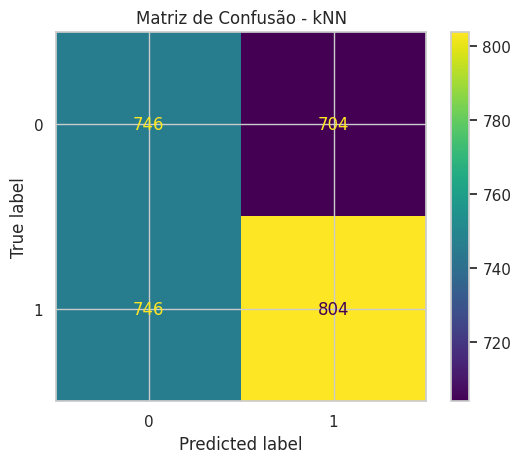

Acurácia kNN: 0.5166666666666667


In [ ]:
# Validação com kNN
best_knn = KNeighborsClassifier(n_neighbors=melhor_k[0])
best_knn.fit(X_train, y_train)
y_pred_knn = best_knn.predict(X_test)
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_knn)).plot()
plt.title("Matriz de Confusão - kNN")
plt.show()
print("Acurácia kNN:", accuracy_score(y_test, y_pred_knn))


Ao analisar a matriz de confusão do modelo kNN (com k = 5), percebo que o desempenho ficou bem equilibrado entre os acertos e os erros nas duas classes. O modelo acertou 746 casos onde realmente **não houve enchente** e também identificou corretamente 804 situações onde **de fato houve uma enchente.**

Por outro lado, ele cometeu dois tipos de erros importantes:

- **Errou 746 vezes classificando como “sem enchente” quando na verdade ocorreu uma.** Isso é preocupante, porque são casos em que o sistema falharia em emitir um alerta em situações de risco real — o que poderia ter consequências graves.

- Também houve **704 falsos positivos**, ou seja, situações em que o modelo previu uma enchente, mas ela não aconteceu. Esses erros podem gerar alarmes falsos e até atrapalhar a tomada de decisão de órgãos públicos.

No geral, o modelo teve uma acurácia de **aproximadamente 51,7%**, o que é pouco acima do chute. Isso mostra que ele ainda não está captando bem os padrões nos dados, mesmo que os erros não estejam concentrados em uma classe só. O modelo está equilibrado, mas pouco eficaz.

Minha percepção é que o kNN, nesse caso, não conseguiu aprender bem as relações entre as variáveis. Pode ser que precise de uma etapa de normalização dos dados, ou talvez seja o caso de testar algoritmos mais robustos — como uma Random Forest ou um XGBoost — pra ver se eles conseguem tirar mais valor do mesmo conjunto de informações.

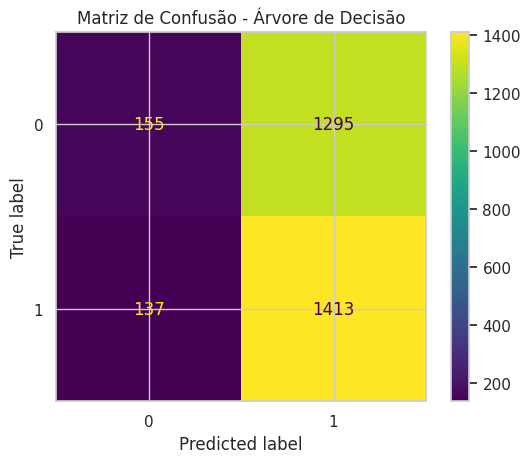

Acurácia Árvore de Decisão: 0.5226666666666666


In [ ]:
# Validação com Árvore de Decisão
best_dt = DecisionTreeClassifier(max_depth=melhor_d[0], random_state=42)
best_dt.fit(X_train, y_train)
y_pred_dt = best_dt.predict(X_test)
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_dt)).plot()
plt.title("Matriz de Confusão - Árvore de Decisão")
plt.show()
print("Acurácia Árvore de Decisão:", accuracy_score(y_test, y_pred_dt))


Já na matriz de confusão da Árvore de Decisão (com max_depth = 6), o comportamento do modelo foi um pouco diferente do kNN, mesmo que a **acurácia final tenha sido parecida — cerca de 52,26%.**

O que mais chama atenção aqui é o **grande número de falsos positivos**: o modelo **previu 1.295 enchentes que na verdade não aconteceram**. Ou seja, ele tem uma forte tendência a prever que vai ocorrer enchente, mesmo quando não há indícios suficientes pra isso.

Por outro lado, ele **acertou 1.413 casos em que realmente houve enchente**, o que é um bom número. Só que ele também **errou 137 vezes classificando como “sem enchente” quando na verdade a enchente aconteceu** — o que, em comparação com o kNN, é um número de **falsos negativos bem menor.**


Em resumo:
- O modelo **é mais sensível** a casos de enchente (classe 1), ou seja, ele prefere “pecar pelo excesso” e emitir um alerta mesmo quando não há risco.

- Isso pode até ser positivo em alguns cenários onde o importante é alertar a população com antecedência, mesmo que haja alguns alarmes falsos.

- Por outro lado, **ele é ruim para detectar corretamente os casos em que não vai acontecer enchente**, o que pode sobrecarregar o sistema com alertas desnecessários.

A performance ainda não é ideal, mas esse modelo mostra um comportamento diferente do kNN: **erra menos nas enchentes reais (falsos negativos menores)**, porém **erra bastante ao prever enchentes que não existem (falsos positivos altos).** Talvez, com mais ajustes nos parâmetros ou com um modelo mais complexo, seja possível encontrar um equilíbrio melhor.

# Conclusão

In [ ]:
# Comparação em tabela
pd.DataFrame({
    "Modelo": ["kNN", "Árvore de Decisão"],
    "Melhor Parâmetro": [f"k={melhor_k[0]}", f"max_depth={melhor_d[0]}"],
    "Acurácia": [melhor_k[1], melhor_d[1]]
})


,Modelo,Melhor Parâmetro,Acurácia
0,kNN,k=5,0.516667
1,Árvore de Decisão,max_depth=6,0.522667


| Modelo                | Parâmetro Otimizado | Acurácia (%) | Principais Características                             |
| --------------------- | ------------------- | ------------ | ------------------------------------------------------ |
| **kNN Classifier**    | k = 5               | 51,67%       | Equilíbrio nos erros, mas acerta pouco                 |
| **Árvore de Decisão** | max\_depth = 6      | 52,26%       | Sensível a enchentes, mas gera muitos falsos positivos |


Após treinar e validar os dois modelos propostos (kNN e Árvore de Decisão), ficou evidente que **nenhum deles alcançou uma performance realmente satisfatória** para um cenário tão sensível quanto o de detecção de enchentes urbanas. Ambos ficaram em torno de **52% de acurácia**, o que está **apenas levemente acima do valor esperado por sorte (50%)**, considerando que a base de dados está balanceada.

O **kNN** demonstrou um comportamento equilibrado entre os erros, mas errou muito em ambos os lados: previu enchentes onde não existiam e deixou de prever onde havia risco. Já a **Árvore de Decisão** mostrou uma tendência clara de “exagerar” nos alertas — acertando mais os casos de enchente real, mas também gerando um número alto de **falsos positivos**, o que pode gerar alarmes desnecessários.

Apesar da baixa acurácia, esses testes são extremamente importantes, pois mostram que **o problema é mais complexo do que parece** e que padrões de enchente não são tão facilmente capturados por modelos simples. Isso reforça a necessidade de:

- Testar **modelos mais sofisticados** (como Random Forest, XGBoost ou SVM);

- Realizar **melhor engenharia de atributos**, combinando variáveis (ex: chuva × elevação, tipo de solo × densidade populacional);

- E aplicar **técnicas de validação mais robustas**, como cross-validation, para ter uma visão mais precisa do desempenho real.